- Port of https://github.com/wiseodd/generative-models/blob/master/GAN/wasserstein_gan/wgan_pytorch.py

In [50]:
import numpy as np
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.datasets import mnist

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
Z_SIZE = 10
LR = 1e-4

In [12]:
(X_train, _), (X_test, _) = mnist.load_data()

In [15]:
def create_G(Z_SIZE=Z_SIZE):
    input_z = Input(shape=(Z_SIZE, ), name='input_z')
    x = Dense(128, activation='relu')(input_z)
    x = Dense(28 * 28, activation='sigmoid')(x)
    x = Reshape((28, 28))(x)
    return Model(inputs=[input_z], outputs=[x])

In [45]:
def create_D():
    input_img = Input(shape=(28, 28), name='input_img')
    x = Flatten()(input_img)
    x = Dense(128, activation='linear')(x)
    x = Dense(1, activation='linear')(x)
    return Model(inputs=[input_img], outputs=[x])

In [16]:
G = create_G()

In [37]:
img = G.predict(np.random.randn(1, 10))

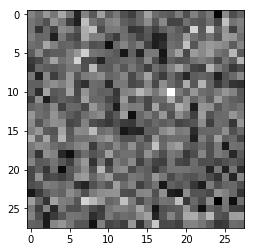

In [38]:
plt.imshow(img[0], cmap=plt.cm.gray)

In [46]:
D = create_D()

In [48]:
D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_img (InputLayer)       (None, 28, 28)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [49]:
D.predict(img)

array([[-1.00445366]], dtype=float32)

In [ ]:
D.compile(optimizer=RMSprop(lr=LR), loss=...)